In [1]:
from matplotlib.lines import Line2D

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
data_energy = [
    ('Actual', [1500, 2470, 1200, 800]),
    ('Non-Renewable', [1200, 2100, 1050, 700]),
    ('Renewable', [300, 400, 150, 100]),
]

data_storage = [
    ('PSU', [15000, 24800, 12000, 8000]),  
    ('Battery', [5000, 12000, 6000, 4000]),  
    ('Pumped Hydro', [8000, 15000, 3000, 2500]),    
]

names = ['Residential', 'Industrial', 'Commercial', 'Agricultural']

In [3]:
colors_storage = ['#1F4F68', '#3F8DAA', '#A7D3E0']
colors_energy  = ['#A74A3A', '#D19B28', '#E6D5A2']

n_groups = len(names)
bar_width = 0.136
x = np.arange(n_groups)

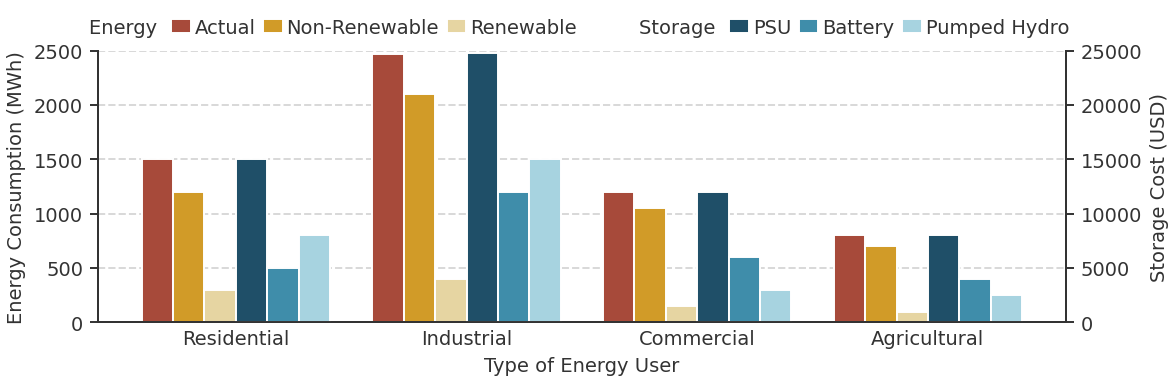

In [4]:
with plt.style.context('custom_styles/minimal_grouped_barchart.mlpstyle'):
    """
    Custom `minimal` matplotlib styles
      - Right axis spine
      - Out tick markers
      - No bottom tick marker
    """
    fig, ax1 = plt.subplots(figsize=(8.6, 3))
    ax2 = ax1.twinx()
    
    # Left y-axis
    for i, (name, values) in enumerate(data_energy):
        ax1.bar(x - (3 - i) * bar_width + bar_width / 2, values, bar_width, 
                label=name, color=colors_energy[i], edgecolor='white')
    
    ax1.yaxis.grid(True)
    ax1.set_axisbelow(True)
    ax1.set_ylabel('Energy Consumption (MWh)')
    ax1.set_xlabel('Type of Energy User')
    ax1.set_xticks(x)
    ax1.set_xticklabels(names)
    ax1.set_ylim(0, 2500)
    
    # Right y-axis 
    for i, (name, values) in enumerate(data_storage):
        ax2.bar(x + (i * bar_width) + bar_width / 2, values, bar_width, 
                label=name, color=colors_storage[i], edgecolor='white')
        
    ax2.set_ylabel('Storage Cost (USD)')
    ax2.set_ylim(0, 25_000)
    
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()

    # --------------------------------------------------------------------------- #
    # Adding the legend to the right side of the plot                             #
    # --------------------------------------------------------------------------- #
    
#     legend1 = ax2.legend(handles1, labels1, loc='upper left',
#                          bbox_to_anchor=(1.11, 0.95), title=f'Energy{" "*25}')
#     legend2 = ax2.legend(handles2, labels2, loc='upper left', 
#                          bbox_to_anchor=(1.11, 0.5),  title=f'Storage{" "*20}')

#     ax2.add_artist(legend1)  # Add the first legend manually to the axes


    # --------------------------------------------------------------------------- #
    # Adding the legend on the top-side of the plot                               #
    # --------------------------------------------------------------------------- #
    
    # Create empty handles for the text labels
    empty_handle_material = Line2D([0], [0], color='none')  # Empty handle for "Energy"
    empty_handle_duration = Line2D([0], [0], color='none')  # Empty handle for "Storage"
    
    handles = (
        [empty_handle_material] + handles1 + 
        [Line2D([0], [0], color='none')] +  # Placeholder for spacing
        [empty_handle_duration] + handles2
    )
    
    labels = ['Energy '] + labels1 + [''] + ['Storage '] + labels2
    legend = ax1.legend(
        handles, 
        labels, 
        loc='upper center', 
        bbox_to_anchor=(0.485, 1.2), 
        ncol=10, 
        handletextpad=0.2,  # Adjust space between handles and text
        borderpad=0.6,      # Adjust space between border and legend items
        columnspacing=0.4,  # Space between columns
        handlelength=1 
    )
    
    fig.tight_layout()
    plt.savefig('figures/grouped_barchart.jpg', dpi=900)
    plt.show()